In [1]:
import matplotlib.pyplot as plt
from functools import lru_cache
from tqdm.auto import tqdm, trange
import plotly.express as px

# Funzioni per il calcolo del paradosso dei compleanni

- fact fa il fattoriale del numero in modo efficiente, tiene in cache i valori per avere una programmazione simil-dinamica
- birthdayParadox fa il calcolo usando la formula matematica semplificata, calcola i valori fattoriali subito quindi va in overflow presto
- birthdayParadox 2 fa il calcolo come viene spiegato, moltiplicando tutte le probabilità da 1 a n-1

In [2]:
@lru_cache(maxsize=None)
def fact(n):
    if n == 0:
        return 1
    return fact(n-1) * n

def birthdayParadox(n):
    # overflow
    return 1 - fact(365)/fact(365-n)/365**n

def birthdayParadox2(n):
    # bad way but no overflow
    out = 1
    for i in range(n):
        out *= (365-i)/365
    return 1-out


calcolo tutte le probabilità da 1(0) a 366(1)

In [3]:
x = range(1, 366)
y = [birthdayParadox2(i) for i in tqdm(x)]

  0%|          | 0/365 [00:00<?, ?it/s]

Trovo il primo numero di persone con probabilità maggiore del 50%

In [4]:
aboveHalf = [i + 1 for i, x in enumerate(y) if x >= 0.5][0]
aboveHalf

23

In [5]:
y[-1]

1.0

# Grafico delle probabilità completo

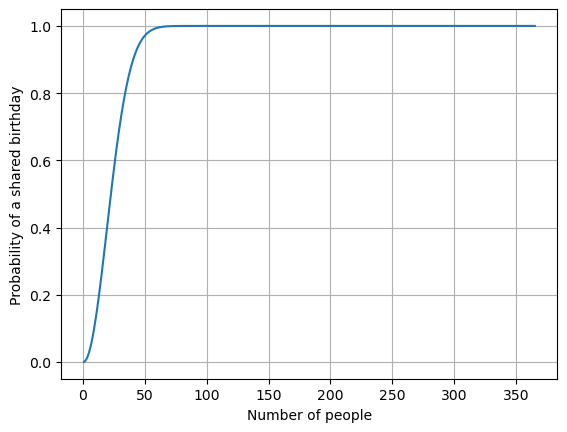

In [6]:
# Plot the results
plt.plot(x, y)
plt.xlabel('Number of people')
plt.ylabel('Probability of a shared birthday')
plt.grid()
plt.show()

# Grafico delle probabilità fino a 40 persone

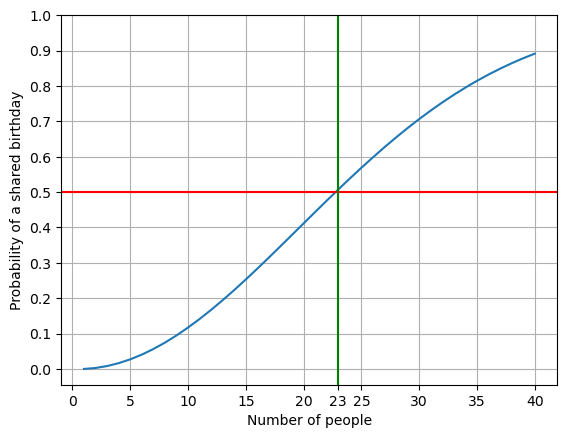

In [7]:
# plot only the first 40 people
num = 40
plt.plot(x[:num], y[:num])
plt.xlabel('Number of people')
plt.ylabel('Probability of a shared birthday')
# red line at 50%
plt.axhline(y=0.5, color='r', linestyle='-')
# green line at the point where the probability is 50%
plt.axvline(x=aboveHalf, color='g', linestyle='-')
# grid with 0.1 increments
plt.xticks([i for i in range(0, num+1, 5)] + [aboveHalf])
plt.yticks([i/10 for i in range(0, 11)])
plt.grid()
plt.show()

In [8]:
fig = px.line(x=x, y=y, labels={'x':'Number of people', 'y':'Probability of a shared birthday'})
fig.add_hline(y=0.5, line_dash="dash", annotation_text="50%", annotation_position="top left")
fig.add_vline(x=aboveHalf, line_dash="dash", annotation_text="{} people".format(aboveHalf))
fig.show()

In [9]:
fig = px.scatter(x=x, y=y, labels={'x':'Number of people', 'y':'Probability of a shared birthday'})
fig.add_hline(y=0.5, line_dash="dash", annotation_text="50%", annotation_position="top left")
fig.add_vline(x=aboveHalf, line_dash="dash", annotation_text="{} people".format(aboveHalf))
fig.show()